In [1]:
# Import libraries 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load raman diabetic datafiles here. ../raw_data/Raman_Diabetes

path = '../raw_data/Raman_Milk/'

# There are five raman spectra corresponding to measurements on different body parts. 
# 1. vein 2. earLobe 3. innerArm 4.thumbnail

# Set file path for each of the spectra files: vein_path,earLobe_path,innerArm_path,thumbnail_path
raman_path = path + '/7341_C2.txt'

data = pd.read_csv(raman_path)
data.head()

,Label,250,251,252,253,254,255,256,257,258,...,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339
0,1,10,10,10,10,10,43.570310,31.487300,16.338870,10.359380,...,10,10,10,10,10,10,10,10,10,10
1,1,10,10,10,10,10,6.282227,-4.985352,-6.870117,2.167969,...,10,10,10,10,10,10,10,10,10,10
2,1,10,10,10,10,10,129.908200,123.578100,92.240230,50.460940,...,10,10,10,10,10,10,10,10,10,10
3,1,10,10,10,10,10,105.136700,93.134770,60.101560,18.257810,...,10,10,10,10,10,10,10,10,10,10
4,1,10,10,10,10,10,66.738280,68.101560,64.845700,58.904300,...,10,10,10,10,10,10,10,10,10,10


In [24]:
cols = data.shape[1]
# convert from pandas dataframe to numpy matrices

X = np.matrix(data.iloc[:,1:cols].values)
y = np.array(data.iloc[:,0].values.ravel()) # first col is y label
print(X)
print(y)

# use map(float, ) to convert the string list to float list
X_names = list(map(float, data.columns.values[1:])) # X_names = np.array(list(data)[1])
labels = list(set(y))
print(labels)

m = X.shape[0]
n = X.shape[1]
print(m,n)

[[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]]
[1 1 1 1 1 2 2 2 2 2 1 1 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 2]
[1, 2]
32 2090


(1, 2090)


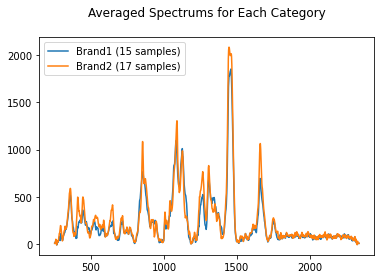

In [36]:
for c in labels: 
    Xc = X[y == c]
    yc = y[y == c] 
    plt.plot(X_names, np.mean(Xc,axis=0).tolist()[0], label= 'Brand' + str(c) + 
    ' (' + str(len(yc)) + ' samples)')
    plt.legend()
    
plt.title(u'Averaged Spectrums for Each Category\n') ;  
print(np.mean(X[y==1],axis=0).shape)